In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)

In [2]:
df = pd.read_csv('datasets.csv')

# Часть 1. EDA

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
del df['Unnamed: 32']

In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [9]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

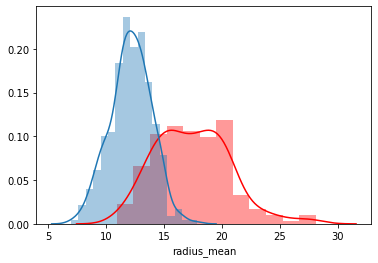

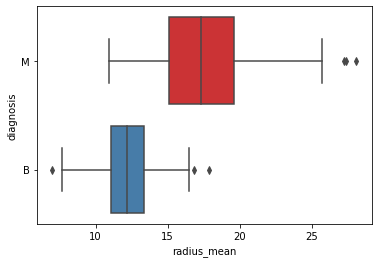

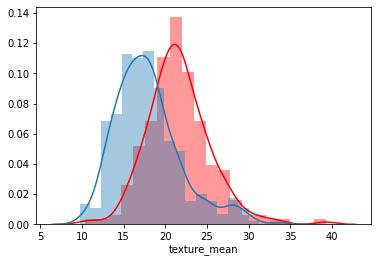

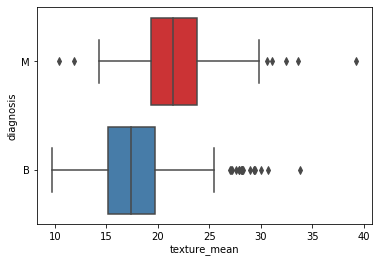

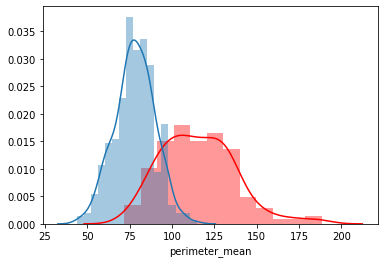

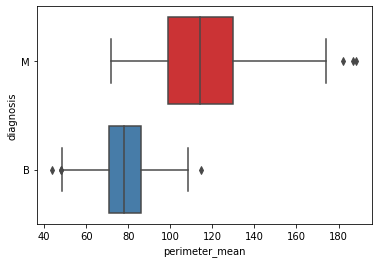

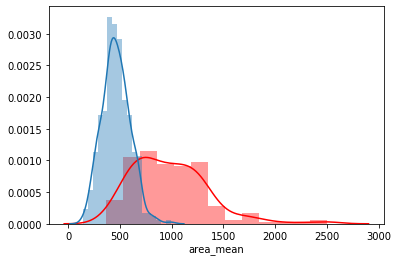

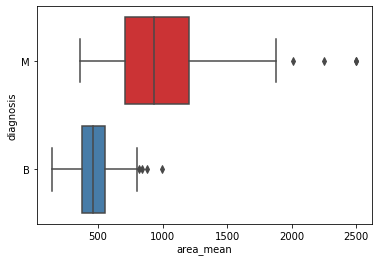

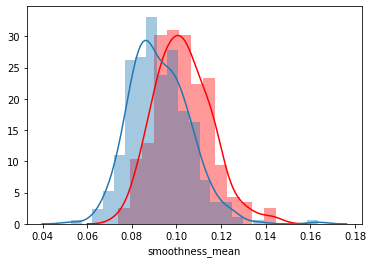

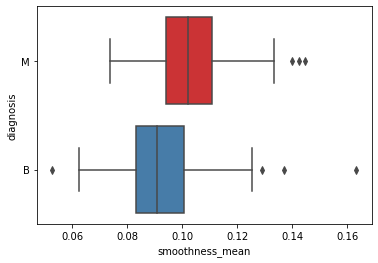

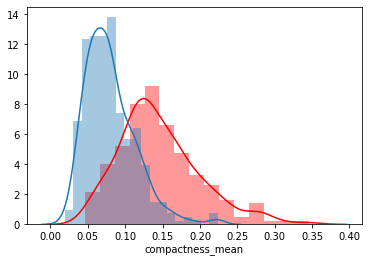

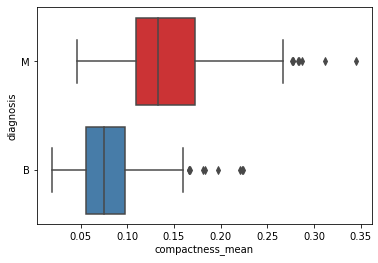

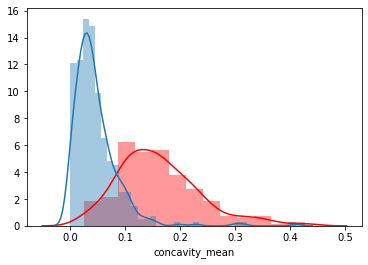

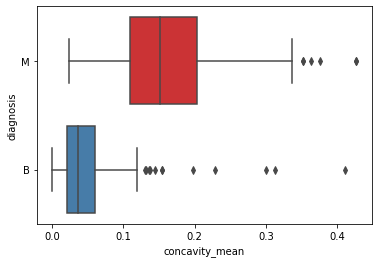

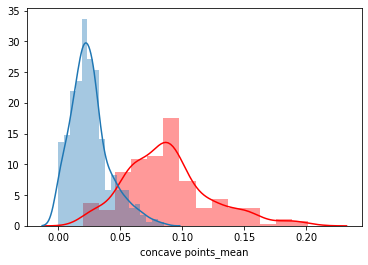

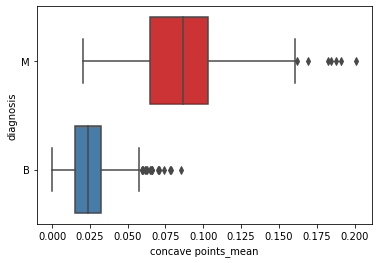

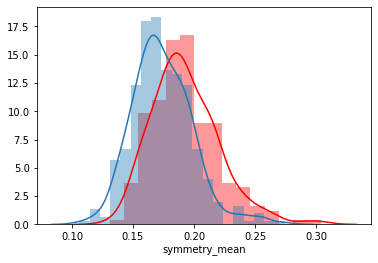

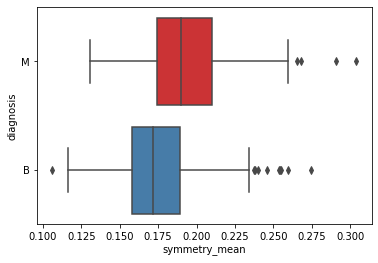

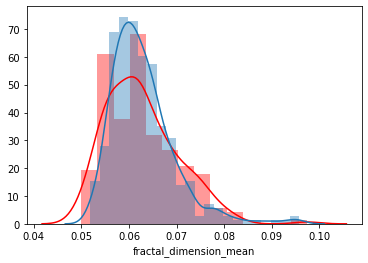

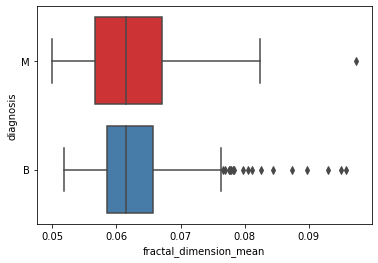

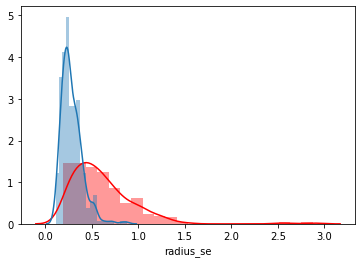

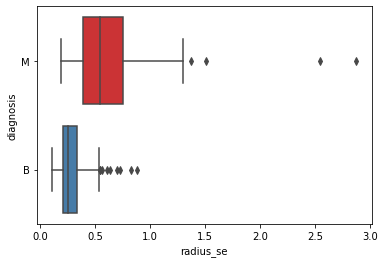

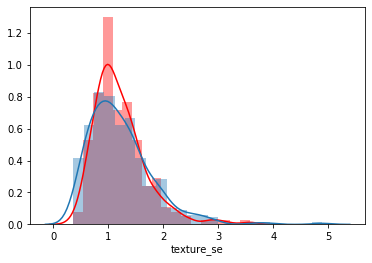

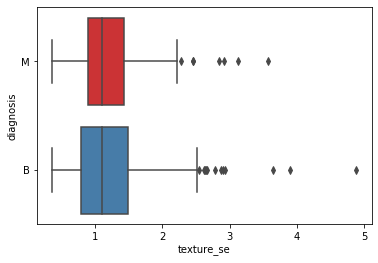

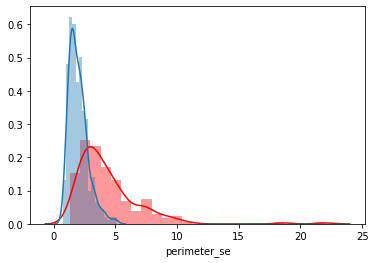

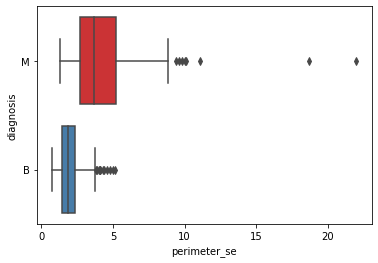

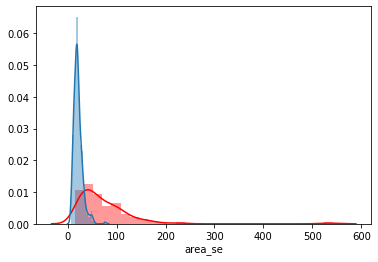

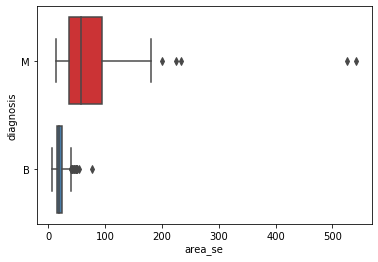

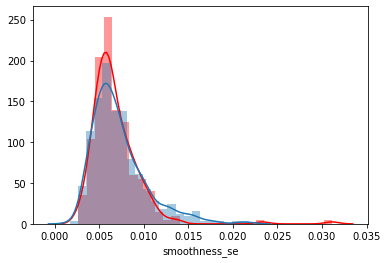

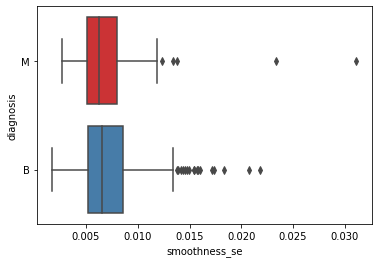

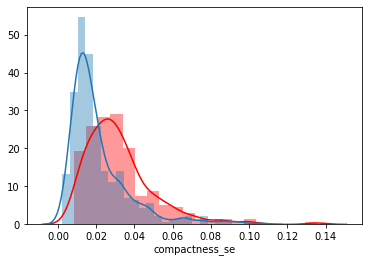

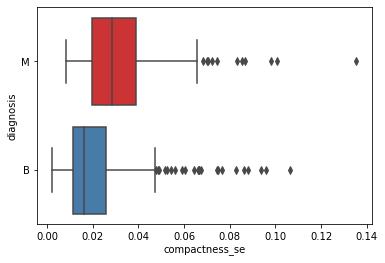

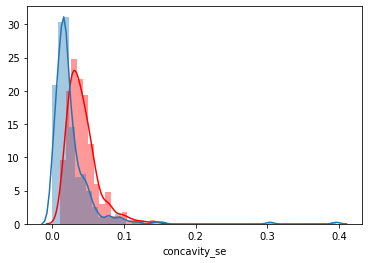

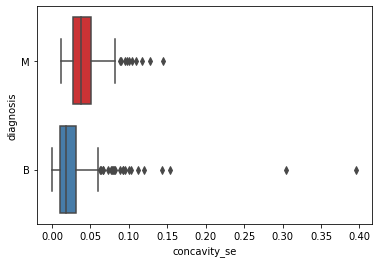

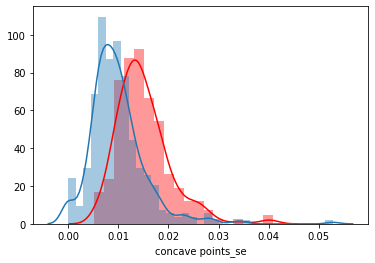

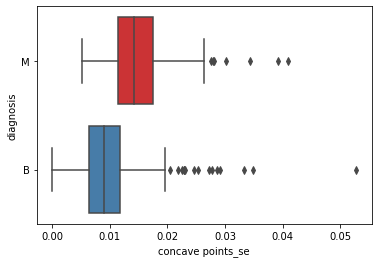

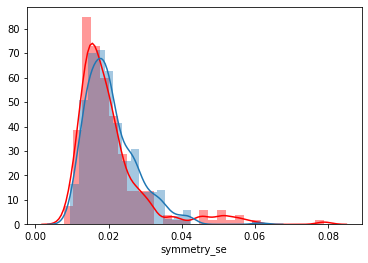

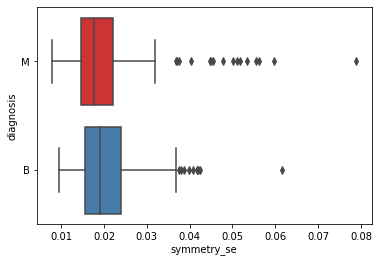

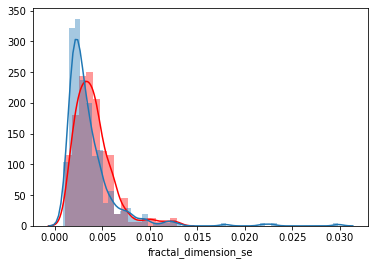

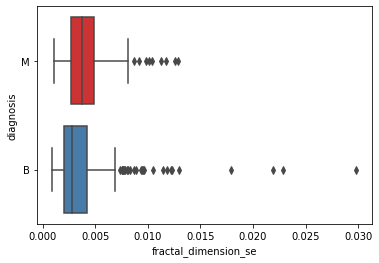

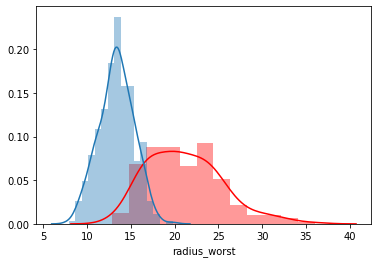

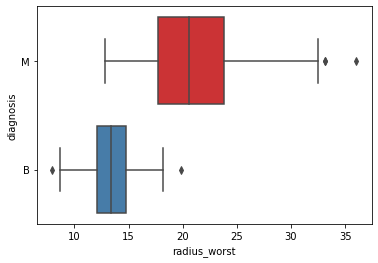

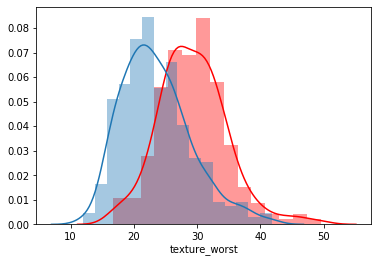

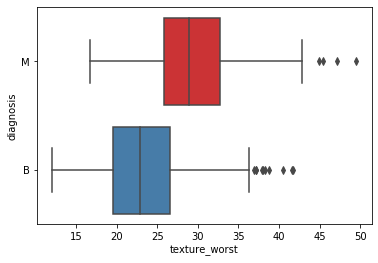

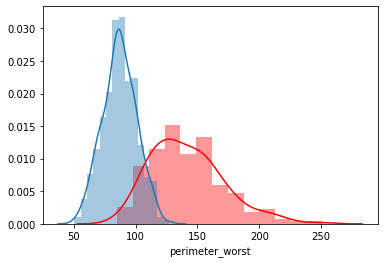

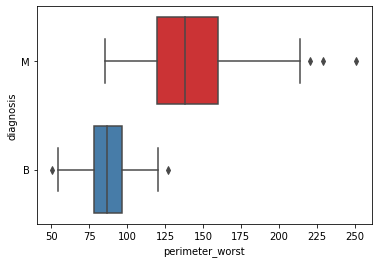

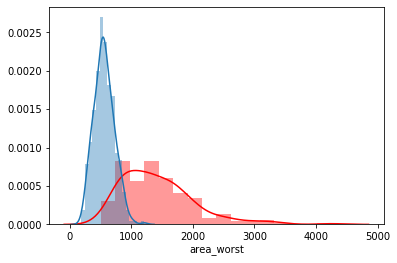

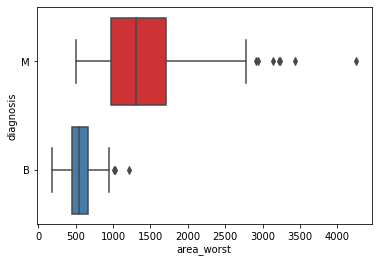

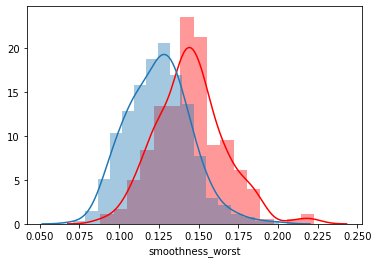

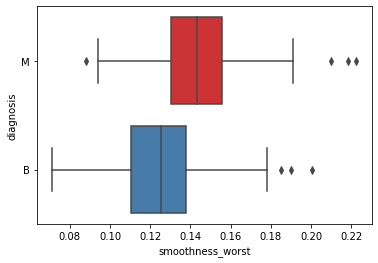

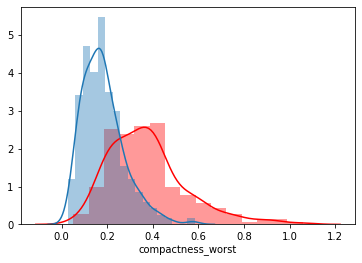

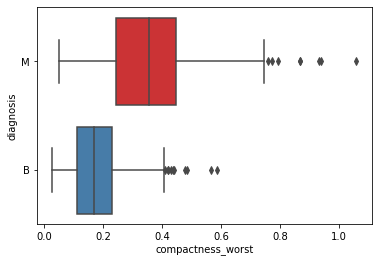

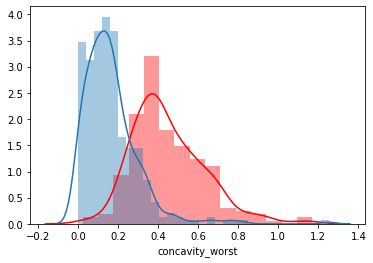

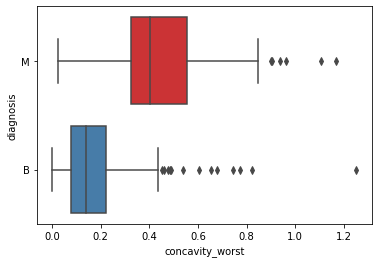

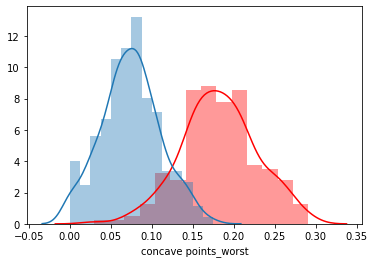

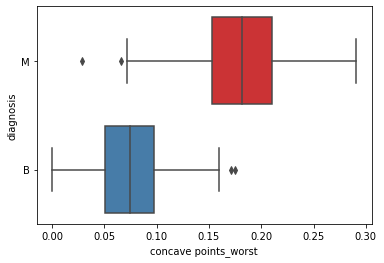

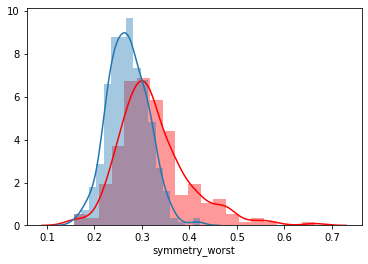

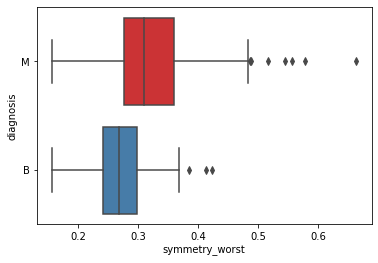

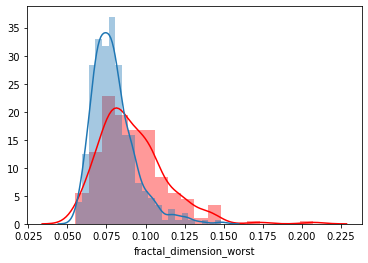

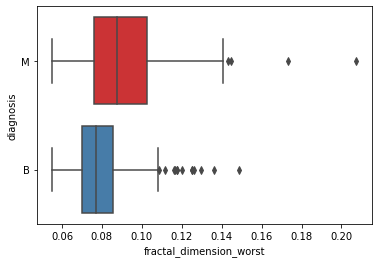

<Figure size 432x288 with 0 Axes>

In [10]:
for col in df:
    if df[col].dtype == 'float64':
        sns.distplot(df[df.diagnosis == 'M'][col], axlabel=col, color='red')
        sns.distplot(df[df.diagnosis == 'B'][col], axlabel=col)
        plt.figure()
        sns.boxplot(data=df, x=col, y='diagnosis', palette='Set1')

        plt.figure()

In [11]:
def find_best_corr(corr, barrier=0.8):
    best_corr_list = []
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[1]):
            if corr.iloc[i,j] > 0.8:
                best_corr_list.append((corr.index[i], corr.columns[j], corr.iloc[i,j]))
    best_corr_list.sort(key=lambda x: x[2], reverse=True)
    return best_corr_list

[('radius_mean', 'perimeter_mean', 0.9978552814938113),
 ('radius_mean', 'area_mean', 0.9873571700566119),
 ('perimeter_mean', 'area_mean', 0.9865068039913906),
 ('concavity_mean', 'concave points_mean', 0.9213910263788594),
 ('compactness_mean', 'concavity_mean', 0.8831206701772499),
 ('perimeter_mean', 'concave points_mean', 0.8509770412528199),
 ('compactness_mean', 'concave points_mean', 0.8311350431336992),
 ('area_mean', 'concave points_mean', 0.823268868652435),
 ('radius_mean', 'concave points_mean', 0.8225285223871791)]

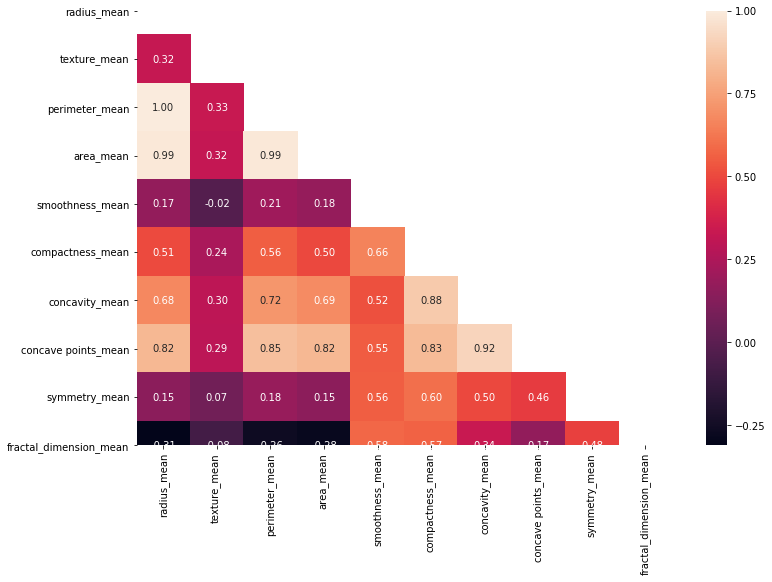

In [12]:
# correlation for mean features
corr = df[list(filter(lambda x: x.find('mean') > -1, df.columns))].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask)
mean_corr = find_best_corr(corr)
mean_corr

[('radius_se', 'perimeter_se', 0.9727936770160752),
 ('radius_se', 'area_se', 0.95183011211099),
 ('perimeter_se', 'area_se', 0.9376554069544158),
 ('compactness_se', 'fractal_dimension_se', 0.8032688176617685),
 ('compactness_se', 'concavity_se', 0.8012683427383301)]

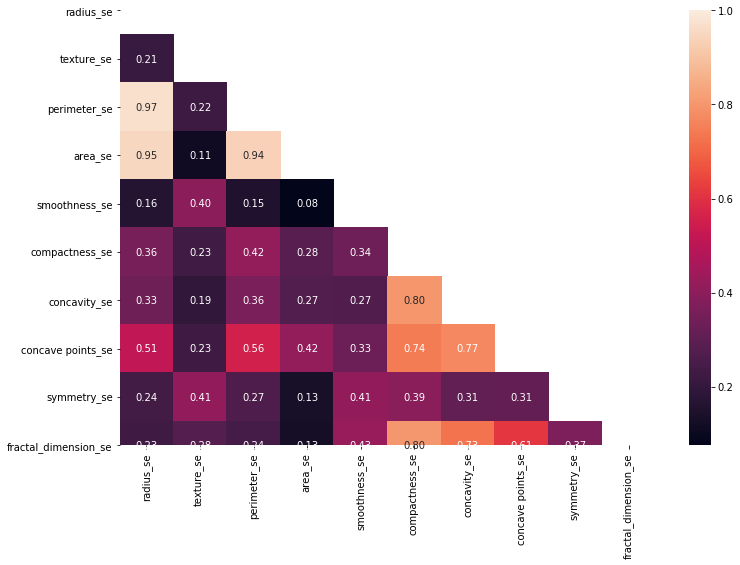

In [13]:
# correlation for se features
corr = df[list(filter(lambda x: x.find('se') > -1, df.columns))].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask)
se_corr = find_best_corr(corr)
se_corr

[('radius_worst', 'perimeter_worst', 0.993707916102951),
 ('radius_worst', 'area_worst', 0.9840145644590724),
 ('perimeter_worst', 'area_worst', 0.9775780914063881),
 ('compactness_worst', 'concavity_worst', 0.8922608987764692),
 ('concavity_worst', 'concave points_worst', 0.8554338603439984),
 ('perimeter_worst', 'concave points_worst', 0.8163221016875445),
 ('compactness_worst', 'fractal_dimension_worst', 0.8104548563116136),
 ('compactness_worst', 'concave points_worst', 0.801080364635253)]

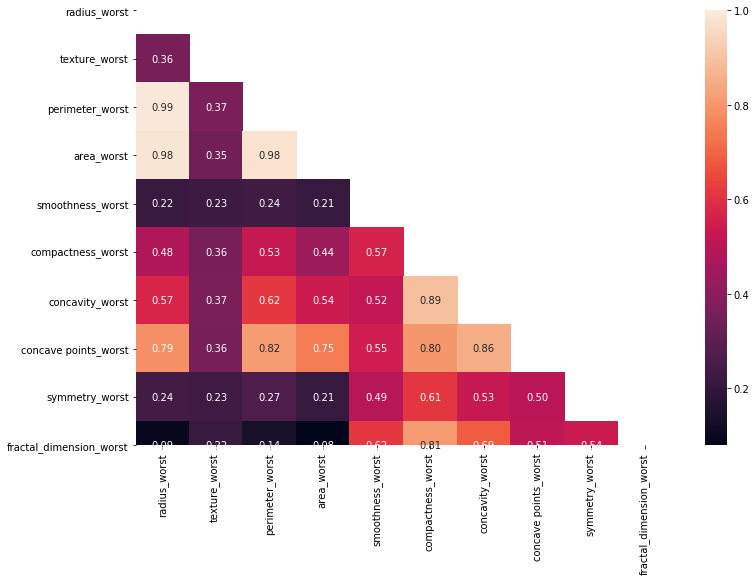

In [14]:
# correlation for se features
corr = df[list(filter(lambda x: x.find('worst') > -1, df.columns))].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask)
worst_corr = find_best_corr(corr)
worst_corr

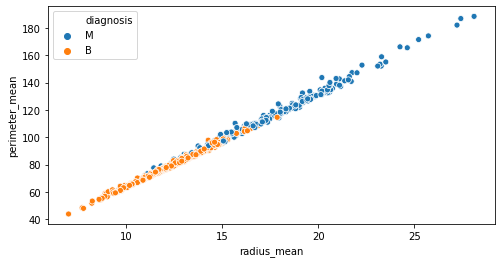

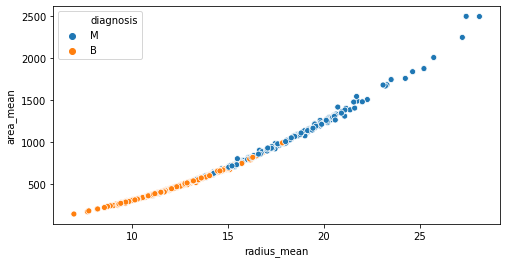

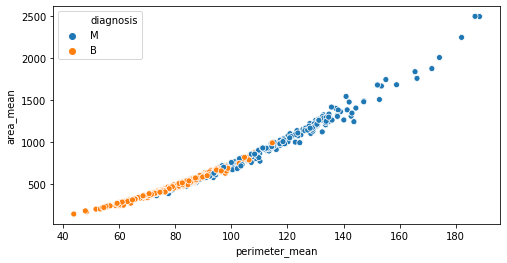

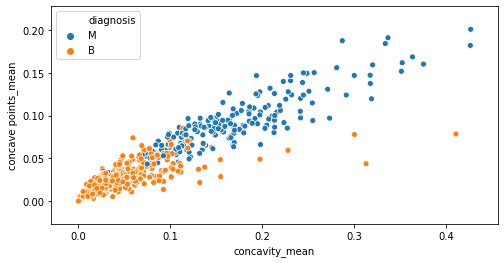

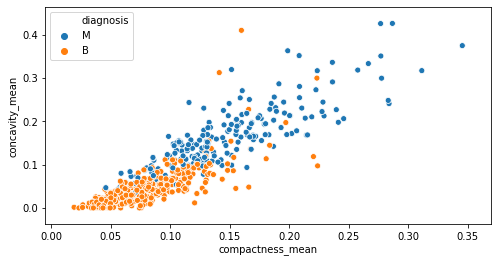

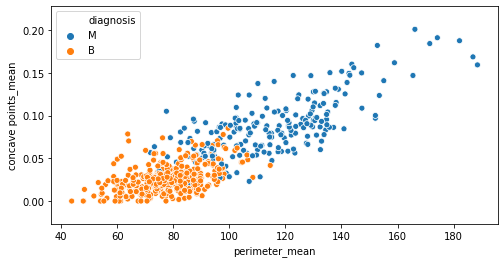

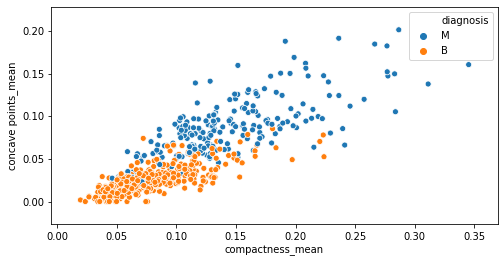

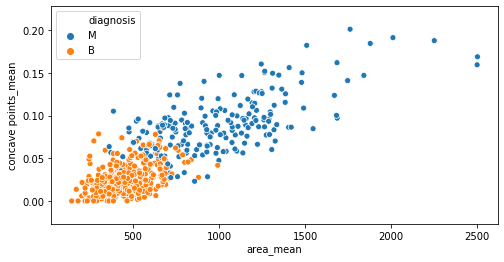

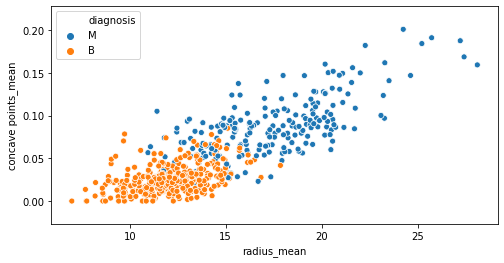

In [15]:
# scatterplots for mean features
for tup in mean_corr:
    plt.figure(figsize=(8,4))
    sns.scatterplot(data=df, x=tup[0], y=tup[1], hue='diagnosis')

In [16]:
# scatterplots for mean features
# for tup in mean_corr:
#     plt.figure(figsize=(8,4))
# sns.boxplot(data=df, x='radius_mean', y='diagnosis')

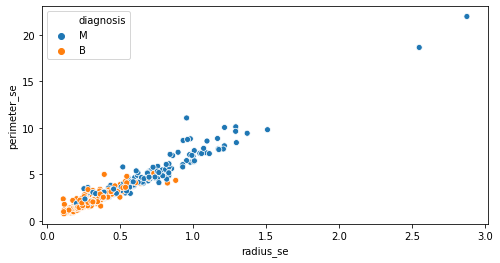

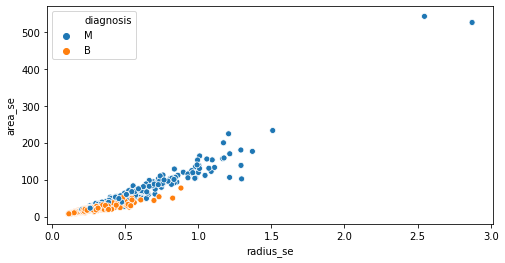

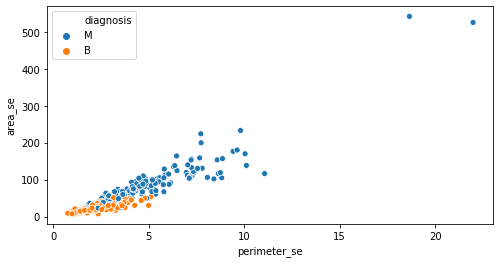

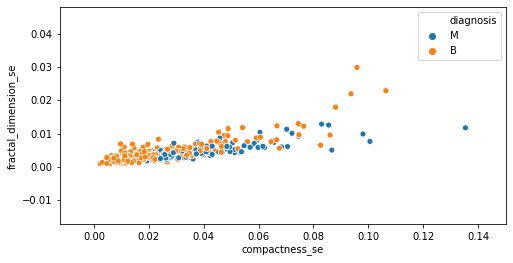

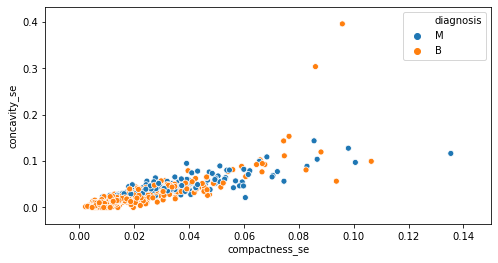

In [17]:
# scatterplots for se features
for tup in se_corr:
    plt.figure(figsize=(8,4))
    sns.scatterplot(data=df, x=tup[0], y=tup[1], hue='diagnosis')

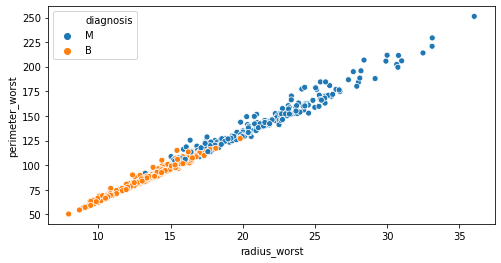

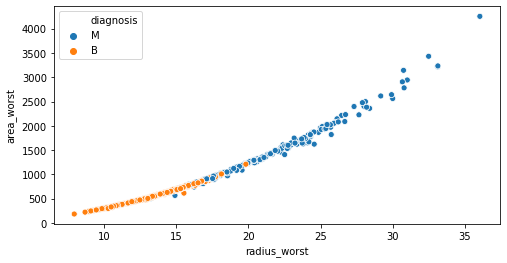

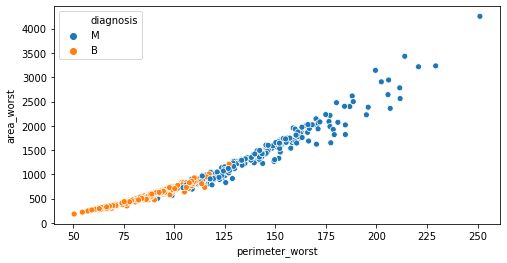

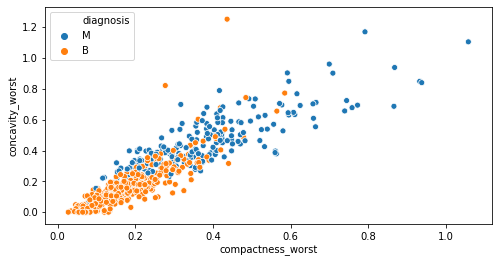

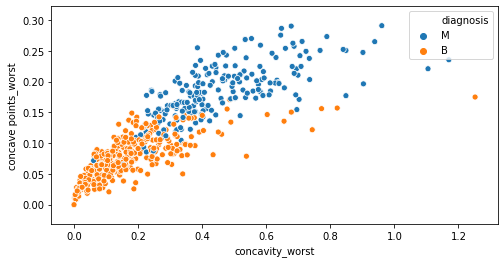

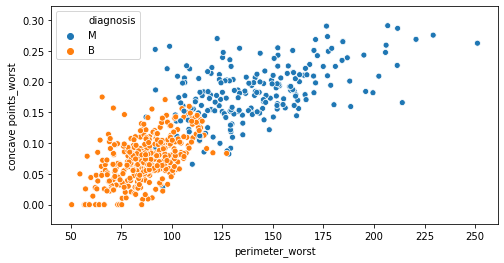

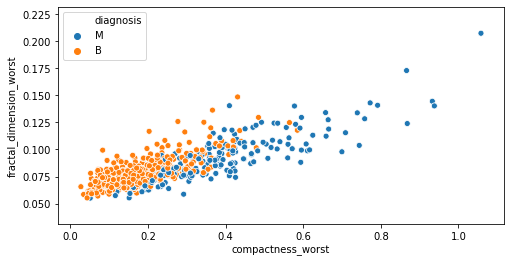

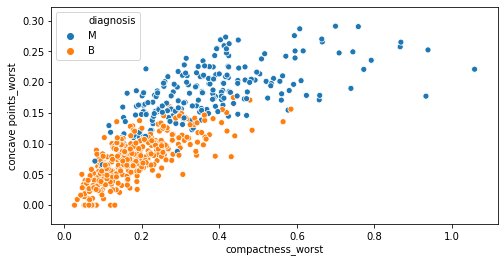

In [18]:
# scatterplots for worst features
for tup in worst_corr:
    plt.figure(figsize=(8,4))
    sns.scatterplot(data=df, x=tup[0], y=tup[1], hue='diagnosis')

## Итог
Наиболее коррелирующие признаки, имеющие причинно следственную связь и различие для диагнозов это:
#### area_mean
#### concave points_mean

# Часть 2. Моделирование при помощи kNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

In [21]:
X = df[['area_mean', 'concave points_mean']]
X.head()

area_mean  concave points_mean
0     1001.0              0.14710
1     1326.0              0.07017
2     1203.0              0.12790
3      386.1              0.10520
4     1297.0              0.10430

In [22]:
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 2), (171, 2), (398,), (171,))

In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Recall
Это самая важная метрика, так как именно она лучше всего отражает кейс, когда злокачественная опухоль была классифицирована, как доброкачественная

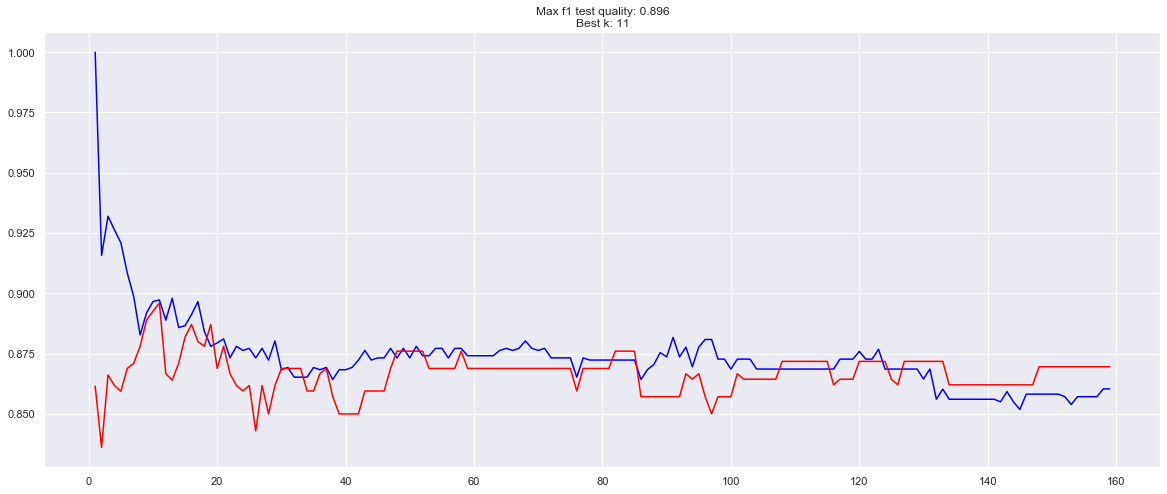

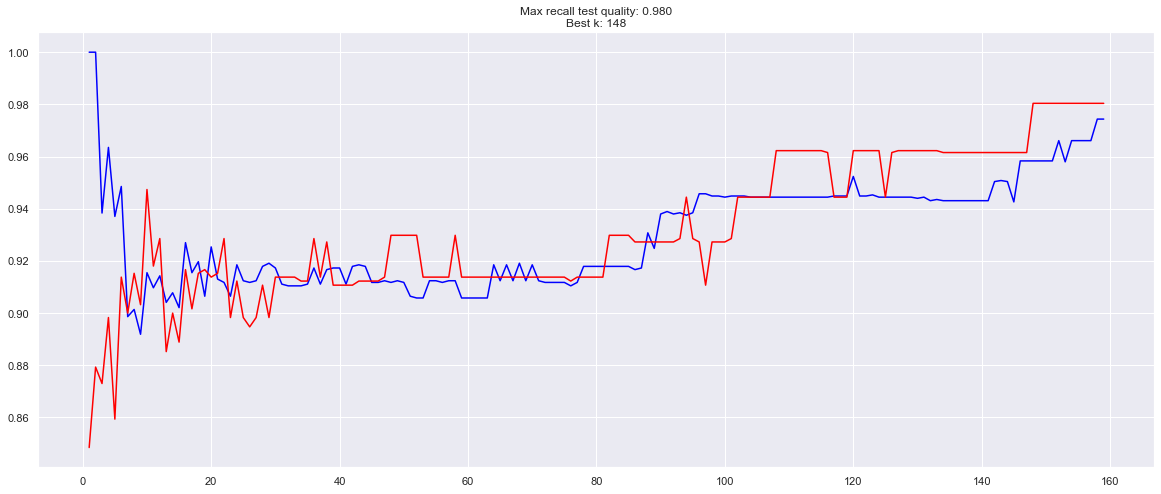

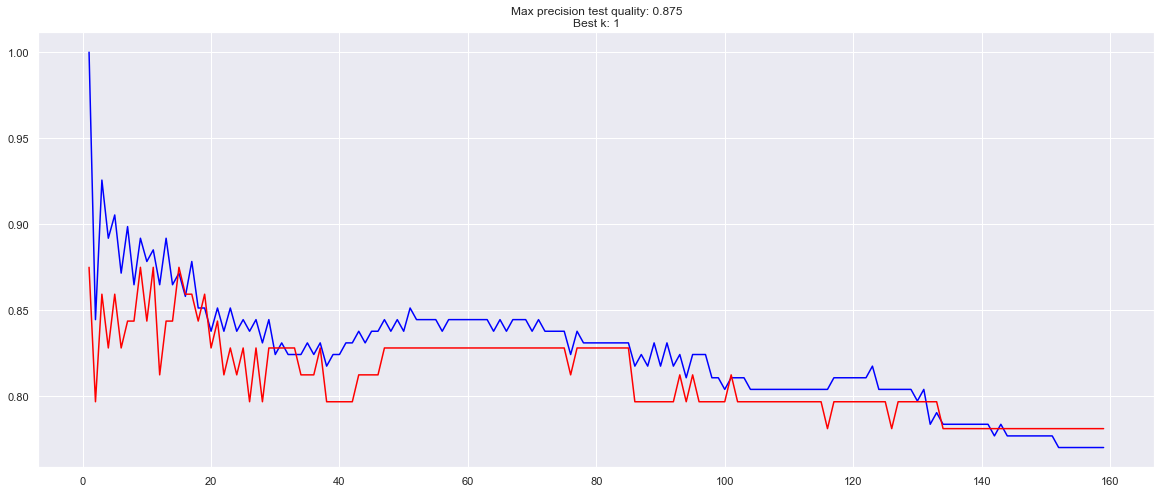

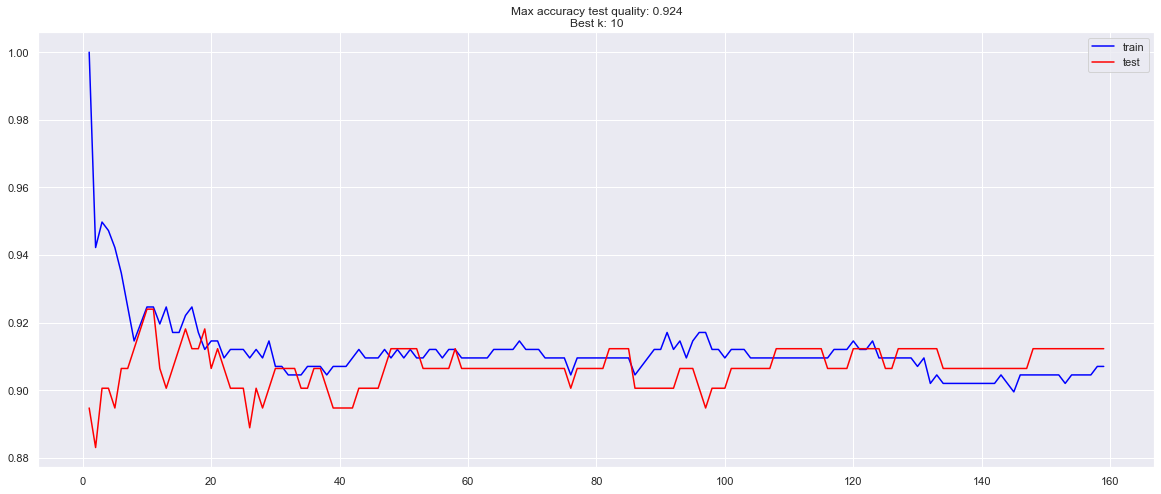

In [40]:
neighbors = range(1, 160)
f1 = {
    'train': [],
    'test': []
}
recall = {
    'train': [],
    'test': []
}
precision = {
    'train': [],
    'test': []
}
accuracy = {
    'train': [],
    'test': []
}
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_predict = knn.predict(X_train)
    test_predict = knn.predict(X_test)
    f1['train'].append(f1_score(train_predict, y_train))
    f1['test'].append(f1_score(test_predict, y_test))
    recall['train'].append(recall_score(train_predict, y_train))
    recall['test'].append(recall_score(test_predict, y_test))
    precision['train'].append(precision_score(train_predict, y_train))
    precision['test'].append(precision_score(test_predict, y_test))
    accuracy['train'].append(accuracy_score(train_predict, y_train))
    accuracy['test'].append(accuracy_score(test_predict, y_test))

sns.set()
plt.figure(figsize=(20,8))
plt.plot(neighbors, f1['train'], color='blue', label='train')
plt.plot(neighbors, f1['test'], color='red', label='test')
plt.title("Max f1 test quality: {:.3f}\nBest k: {}".format(max(f1['test']), np.argmax(f1['test'])+1))
plt.figure(figsize=(20,8))    
plt.plot(neighbors, recall['train'], color='blue', label='train')
plt.plot(neighbors, recall['test'], color='red', label='test')
plt.title("Max recall test quality: {:.3f}\nBest k: {}".format(max(recall['test']), np.argmax(recall['test'])+1))
plt.figure(figsize=(20,8))
plt.plot(neighbors, precision['train'], color='blue', label='train')
plt.plot(neighbors, precision['test'], color='red', label='test')
plt.title("Max precision test quality: {:.3f}\nBest k: {}".format(max(precision['test']), np.argmax(precision['test'])+1))
plt.figure(figsize=(20,8))
plt.plot(neighbors, accuracy['train'], color='blue', label='train')
plt.plot(neighbors, accuracy['test'], color='red', label='test')
plt.title("Max accuracy test quality: {:.3f}\nBest k: {}".format(max(accuracy['test']), np.argmax(accuracy['test'])+1))
plt.legend()

### Лучший результат достигается при k=150